<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/pandas_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Podział danych

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('Pokemon.csv')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
dataframe = pd.read_csv('Pokemon.csv')
#print(dataframe)

unikatowe_typy = dataframe['Type 1'].unique()
print(unikatowe_typy)
ile_unikatowych_typów = len(unikatowe_typy)
print(f'Ile jest typów pokemonów {ile_unikatowych_typów}')

type_counts= dataframe["Type 1"].value_counts()
print(type_counts)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Ile jest typów pokemonów 18
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


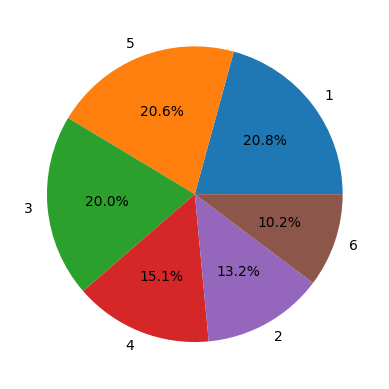

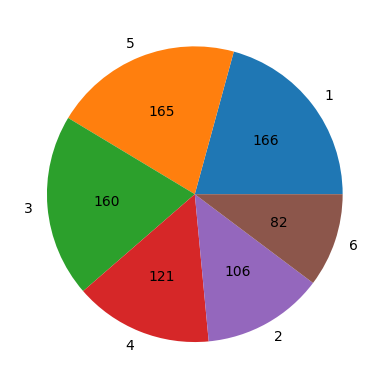

In [ ]:
#Policz ile jest pokemonów z danej generacji

generation_counts = dataframe["Generation"].value_counts()
print(generation_counts)

import matplotlib.pyplot as plt
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%')
plt.show()

plt.pie(generation_counts,
        labels=generation_counts.index,
        autopct=lambda pct: f"{int(round(pct/100.*generation_counts.sum()))}")
plt.show()

In [ ]:
A = dataframe['Legendary']
B = dataframe[A == True]
C = len(B)

print(C)

65


In [ ]:
T2 = dataframe['Type 2']
T2bezType = T2.isnull().sum()
print(T2bezType)

386


In [ ]:
Top10 = dataframe['Total'].nlargest(10)
print(Top10)

163    780
164    780
426    780
422    770
424    770
552    720
268    700
409    700
413    700
418    700
Name: Total, dtype: int64


In [ ]:
average_hp_by_type = dataframe.groupby('Type 1')['HP'].mean()
print(f'Średnia HP dla typów {average_hp_by_type}')
average_hp = dataframe['HP'].mean()
print(f'Średnia dla HP {average_hp}')

Średnia HP dla typów Type 1
Bug         56.884058
Dark        66.806452
Dragon      83.312500
Electric    59.795455
Fairy       74.117647
Fighting    69.851852
Fire        69.903846
Flying      70.750000
Ghost       64.437500
Grass       67.271429
Ground      73.781250
Ice         72.000000
Normal      77.275510
Poison      67.250000
Psychic     70.631579
Rock        65.363636
Steel       65.222222
Water       72.062500
Name: HP, dtype: float64
Średnia dla HP 69.25875


7) Znajdź wszystkie pokemony, których typ (Type 1) to ogień
8) Wyświetl pokemony z HP większe od 100
9) Wyswietl pokemony z Speed wieksze od 120
10) Wyswietl pokemony które mają atak >100 ORAZ Defence < 50
regresja liniowa

In [ ]:
A = dataframe['Type 1']
B = dataframe[A == 'Fire']
C = B['#'].count()
print(C)

#fire_pokemon = dataframe[dataframe['Type 1'] == 'Fire']['#'].count()
#print(fire_pokemon)

52


In [ ]:
A = dataframe['HP']
B = dataframe[A > 100]
C = B['#'].count()
print(C)

67


In [ ]:
A = dataframe['Speed']
B = dataframe[A > 120]
C = B['#'].count()
print(C)

29


In [ ]:
A = dataframe['Attack']
B = dataframe['Defense']
C = dataframe[(A > 100) & (B < 50)]
D = C['#'].count()
print(D)

5


## ***llm***
##### (attak defence legendarny i normalny)

Klasyfikacja pokemonów attak defence legendarny i normalny

In [ ]:
# prompt: Klasyfikacja pokemonów attak defence legendarny i normalny

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Załaduj dane
dataframe = pd.read_csv('Pokemon.csv')

# Przygotuj dane do klasyfikacji
X = dataframe[['Attack', 'Defense']]
Y = dataframe['Legendary'].astype(int)  # Konwersja wartości logicznych na liczby 1 i 0

In [ ]:
Y.value_counts()

print(f"Liczba zwykłych Pokémonów (0): {Y.value_counts()[0]}")
print(f"Liczba legendarnych Pokémonów (1): {Y.value_counts()[1]}")

Liczba zwykłych Pokémonów (0): 735
Liczba legendarnych Pokémonów (1): 65


In [ ]:
#Podział na zbiór uczący i testowy
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)
#Tworzenie i trenowanie modelu
model = LogisticRegression()# Tworzy obiekt modelu regresji logistycznej
model.fit(X_train, Y_train)

# Predykcja na zbiorze testowym
Y_pred = model.predict(X_test)

|                   | Predykcja = 1        | Predykcja = 0        |
|-------------------|----------------------|----------------------|
| **Rzeczywista = 1** | True Positive (TP)   | False Negative (FN)  |
| **Rzeczywista = 0** | False Positive (FP)  | True Negative (TN)   |

**Metryki:**

| Metryka           | Wzór                                                  |
|-------------------|-------------------------------------------------------|
| accuracy_score    | (TP + TN) / (TP + TN + FP + FN)                       |
| precision_score   | TP / (TP + FP)                                        |
| recall_score      | TP / (TP + FN)                                        |
| f1_score          | 2 · (precision · recall) / (precision + recall)       |


In [ ]:
accuracy  = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall    = recall_score(Y_test, Y_pred)
f1        = f1_score(Y_test, Y_pred)


***Accuracy*** mierzy odsetek wszystkich poprawnie sklasyfikowanych przykładów (pozytywnych i negatywnych) w zbiorze danych

***Precision*** to odsetek poprawnych predykcji klasy „pozytywnej” spośród wszystkich przykładów oznaczonych przez model jako pozytywne

***Recall*** (zwany też TPR – True Positive Rate lub sensitivity) to odsetek prawdziwych pozytywów wychwyconych przez model spośród wszystkich rzeczywistych przykładów pozytywnych

***F1‑score*** to harmoniczna średnia precyzji i recall, łącząca oba aspekty w jedną miarę

In [ ]:
print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1-score:  {f1:.4f}')

print('\nClassification Report:\n', classification_report(Y_test, Y_pred))


Accuracy:  0.9375
Precision: 0.5000
Recall:    0.2000
F1-score:  0.2857

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.50      0.20      0.29        10

    accuracy                           0.94       160
   macro avg       0.72      0.59      0.63       160
weighted avg       0.92      0.94      0.92       160



`plt.figure(figsize=(8, 6))`

Tworzy nowy obszar rysowania o rozmiarze 8×6 cala.

`plt.scatter(...)`

Rysuje punkty na wykresie:

Oś X: wartość Attack.

Oś Y: wartość Defense.

`c=Y_pred` – kolor zależy od przewidywanej klasy.

`cmap='coolwarm'` – paleta kolorów od niebieskiego przez biały do czerwonego.

`edgecolors='k'` – czarne obramowanie punktów.

`alpha=0.7` – przezroczystość, by widzieć nakładające się punkty.

`plt.xlabel, plt.ylabel, plt.title`

Etykiety osi i tytuł wykresu.

`plt.colorbar(...)`

Dodaje legendę kolorów, wyjaśniającą, która barwa odpowiada której klasie.

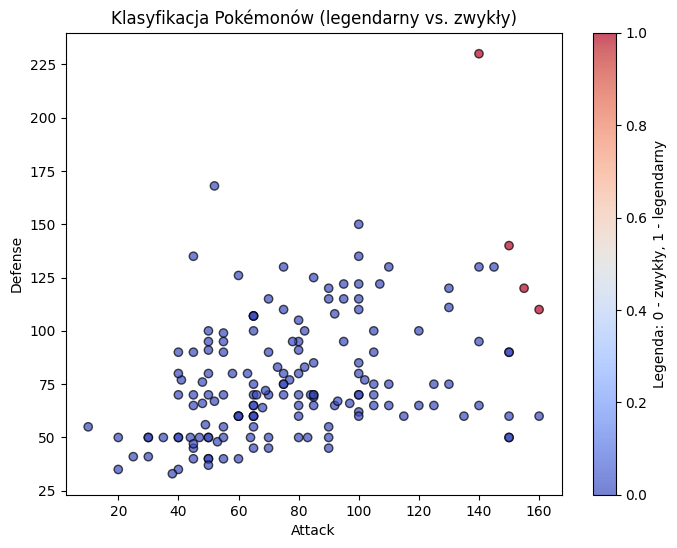

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_test['Attack'],
    X_test['Defense'],
    c=Y_pred,
    cmap='coolwarm',
    edgecolors='k',
    alpha=0.7
)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Klasyfikacja Pokémonów (legendarny vs. zwykły)')
plt.colorbar(label='Legenda: 0 - zwykły, 1 - legendarny')
plt.show()


## ***llm***
##### (attack defence od wszystkich gen)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Wczytanie danych
dataframe = pd.read_csv('Pokemon.csv')

# Wybór cech i etykiet
X = dataframe[['Attack', 'Defense']]
Y = dataframe['Generation']

In [ ]:
# Podział na zbiór treningowy i testowy
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

# Standaryzacja
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [ ]:
# Cechy wielomianowe (stopień 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_s)
X_test_p  = poly.transform(X_test_s)

In [ ]:
# GridSearch dla Random Forest z dostosowanymi hiperparametrami
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid.fit(X_train_p, Y_train)
rf_best = grid.best_estimator_

Accuracy: 0.2562
              precision    recall  f1-score   support

           1       0.22      0.33      0.27        33
           2       0.17      0.10      0.12        21
           3       0.27      0.25      0.26        32
           4       0.41      0.29      0.34        24
           5       0.26      0.39      0.31        33
           6       0.00      0.00      0.00        17

    accuracy                           0.26       160
   macro avg       0.22      0.23      0.22       160
weighted avg       0.24      0.26      0.24       160

Mean CV Accuracy: 0.2350 ± 0.0434


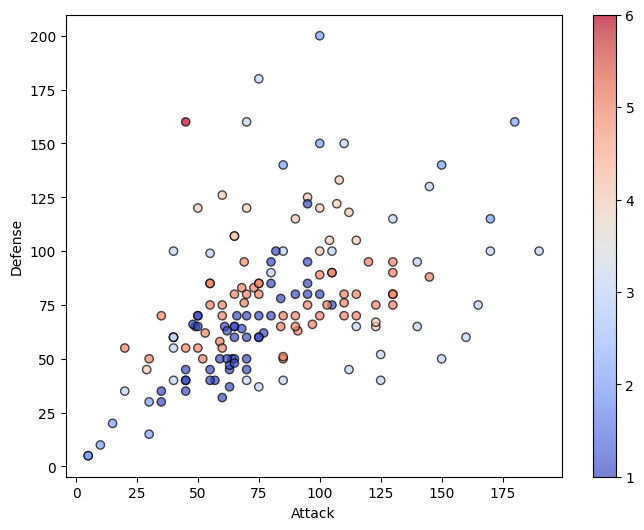

In [ ]:
# Ocena na zbiorze testowym
Y_pred = rf_best.predict(X_test_p)
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
print(classification_report(Y_test, Y_pred))

# Cross-validation na całym zbiorze
scores = cross_val_score(
    rf_best,
    poly.transform(scaler.transform(X)),
    Y, cv=5, scoring='accuracy', n_jobs=-1
)
print(f"Mean CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Wizualizacja danych i decyzji
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Attack'], X_test['Defense'], c=Y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.colorbar()
plt.show()

## ***llm***
##### (attack defence od 1 i 2 gen)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Wczytanie danych
df = pd.read_csv('Pokemon.csv')

# Filtrowanie tylko 1. i 2. generacji
filtered_df = df[df['Generation'].isin([1, 2])]

In [ ]:
# Wybór cech i etykiet
X = filtered_df[['Attack', 'Defense']]
Y = filtered_df['Generation']

# Podział na zbiór uczący i testowy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Trening modelu
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predykcja
Y_pred = model.predict(X_test)


In [ ]:
# Metryki
print(f'Accuracy: {accuracy_score(Y_test, Y_pred):.4f}')
print(f'Precision: {precision_score(Y_test, Y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(Y_test, Y_pred, average="weighted"):.4f}')
print(f'F1-score: {f1_score(Y_test, Y_pred, average="weighted"):.4f}')
print('\nClassification Report:\n', classification_report(Y_test, Y_pred))



Accuracy: 0.6364
Precision: 0.4050
Recall: 0.6364
F1-score: 0.4949

Classification Report:
               precision    recall  f1-score   support

           1       0.64      1.00      0.78        35
           2       0.00      0.00      0.00        20

    accuracy                           0.64        55
   macro avg       0.32      0.50      0.39        55
weighted avg       0.40      0.64      0.49        55



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

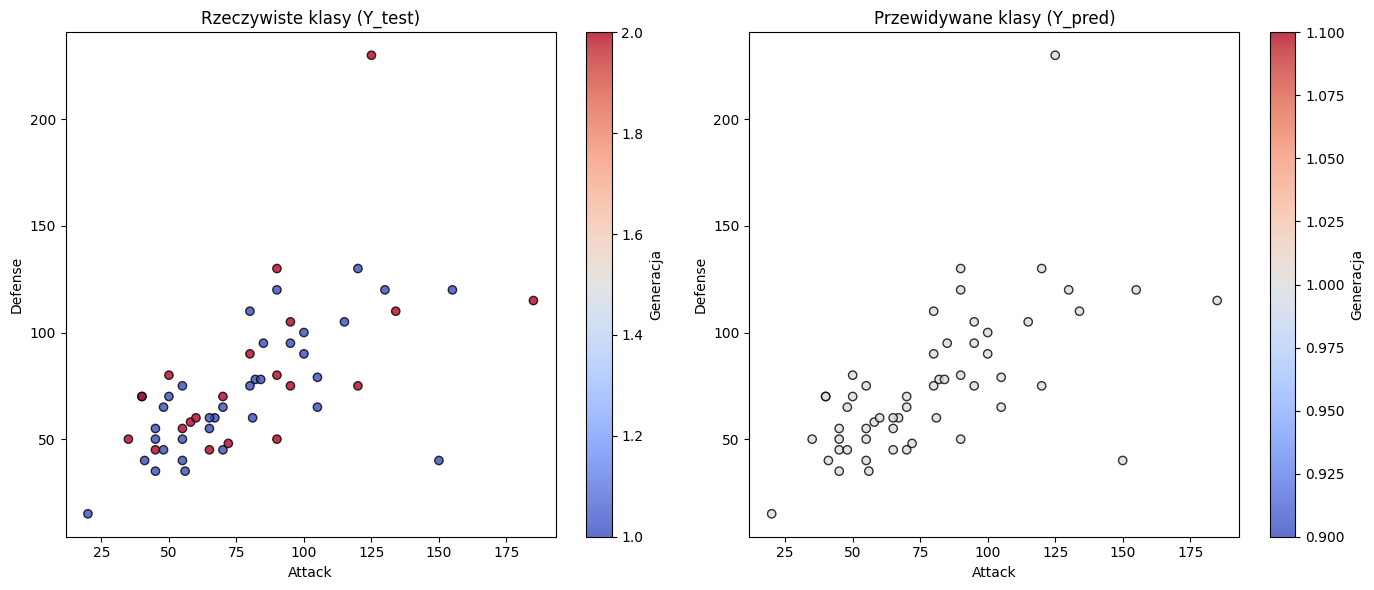

In [ ]:
# Wykresy: Y_test vs Y_pred
plt.figure(figsize=(14, 6))

# Wykres 1 – rzeczywiste klasy
plt.subplot(1, 2, 1)
plt.scatter(X_test['Attack'], X_test['Defense'],
            c=Y_test, cmap='coolwarm', edgecolors='k', alpha=0.8)
plt.title('Rzeczywiste klasy (Y_test)')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.colorbar(label='Generacja')

# Wykres 2 – przewidywane klasy
plt.subplot(1, 2, 2)
plt.scatter(X_test['Attack'], X_test['Defense'],
            c=Y_pred, cmap='coolwarm', edgecolors='k', alpha=0.8)
plt.title('Przewidywane klasy (Y_pred)')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.colorbar(label='Generacja')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


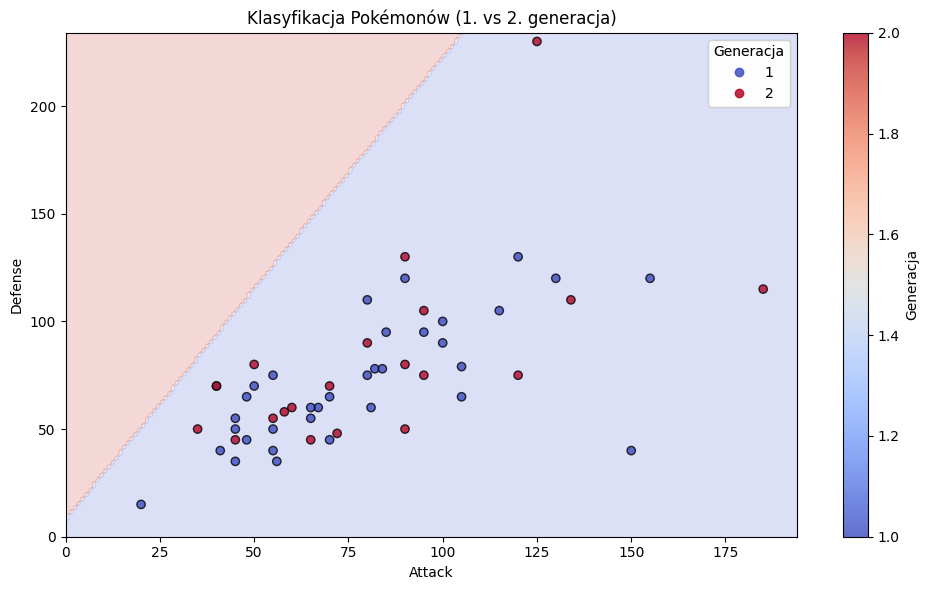

In [ ]:
# Wykres z granicą decyzyjną
plt.figure(figsize=(10, 6))

# Przygotowanie siatki
h = 1  # krok siatki
x_min, x_max = X['Attack'].min() - 5, X['Attack'].max() + 5
y_min, y_max = X['Defense'].min() - 5, X['Defense'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predykcja dla każdego punktu siatki
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Rysowanie stref decyzyjnych
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Punkty testowe
scatter = plt.scatter(X_test['Attack'], X_test['Defense'],
                      c=Y_test, cmap='coolwarm', edgecolors='k', alpha=0.8)

plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Klasyfikacja Pokémonów (1. vs 2. generacja)')

# Legenda i kolorbar
legend1 = plt.legend(*scatter.legend_elements(), title="Generacja")
plt.gca().add_artist(legend1)
plt.colorbar(label='Generacja')

plt.tight_layout()
plt.show()

## zabawa  123

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1020 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1020 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

Best params: {'max_depth': 23, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 212}

Test Accuracy: 0.3250
              precision    recall  f1-score   support

           1       0.31      0.45      0.37        33
           2       0.00      0.00      0.00        21
           3       0.30      0.38      0.33        32
           4       0.39      0.29      0.33        24
           5       0.34      0.42      0.38        33
           6       0.80      0.24      0.36        17

    accuracy                           0.33       160
   macro avg       0.36      0.30      0.30       160
weighted avg       0.34      0.33      0.31       160

CV Accuracy: 0.2488 ± 0.0396


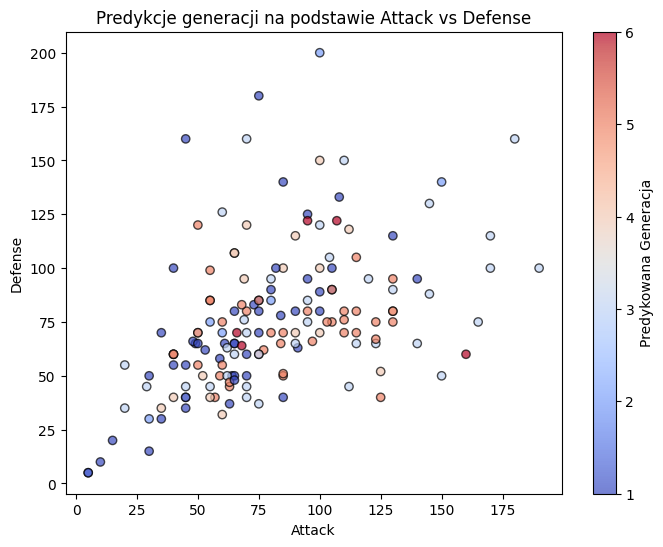

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.stats import randint

# 1. Wczytanie danych
df = pd.read_csv('Pokemon.csv')

# 2. Rozszerzenie zestawu cech
features = ['Attack', 'Defense', 'HP', 'Speed', 'Sp. Atk', 'Sp. Def', 'Total']
X = df[features]
y = df['Generation']

# 3. Podział na train/test z zachowaniem rozkładu klas
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Standaryzacja
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 5. Dodanie cech wielomianowych (stopień 2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_p = poly.fit_transform(X_train_s)
X_test_p  = poly.transform(X_test_s)

# 6. RandomizedSearchCV dla Random Forest
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=300,
    cv=StratifiedKFold(10),
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rand_search.fit(X_train_p, y_train)
best_rf = rand_search.best_estimator_
print("Best params:", rand_search.best_params_)

# 7. Ocena na zbiorze testowym
y_pred = best_rf.predict(X_test_p)
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 8. Cross‑validation na całym zbiorze
X_full_p = poly.transform(scaler.transform(X))
cv_scores = cross_val_score(best_rf, X_full_p, y, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 9. Wizualizacja decyzji na danych testowych
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_test['Attack'],
    X_test['Defense'],
    c=y_pred,
    cmap='coolwarm',
    edgecolors='k',
    alpha=0.7
)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Predykcje generacji na podstawie Attack vs Defense')
plt.colorbar(scatter, label='Predykowana Generacja')
plt.show()